# Libraries

In [490]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from tabulate import tabulate
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import json
import zipfile

# Load data from kaggle folders

In [485]:
# Load Kaggle API key
with open('C:/Users/ketak/kaggle.json') as f:
    kaggle_api_key = json.load(f)

# Set Kaggle API key environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_api_key['username']
os.environ['KAGGLE_KEY'] = kaggle_api_key['key']

# Run Kaggle command to download the dataset
!kaggle datasets download -d ketakidabekar/vegan-ingredients -p extracted_data


  0%|          | 0.00/354M [00:00<?, ?B/s]
  0%|          | 1.00M/354M [00:00<03:27, 1.78MB/s]
  1%|          | 2.00M/354M [00:00<02:12, 2.78MB/s]
  1%|          | 3.00M/354M [00:01<01:48, 3.39MB/s]
  1%|1         | 4.00M/354M [00:01<01:37, 3.76MB/s]
  1%|1         | 5.00M/354M [00:01<01:30, 4.04MB/s]
  2%|1         | 6.00M/354M [00:01<01:26, 4.21MB/s]
  2%|1         | 7.00M/354M [00:01<01:24, 4.33MB/s]
  2%|2         | 8.00M/354M [00:02<01:22, 4.40MB/s]
  3%|2         | 9.00M/354M [00:02<01:21, 4.46MB/s]
  3%|2         | 10.0M/354M [00:02<01:20, 4.51MB/s]
  3%|3         | 11.0M/354M [00:02<01:19, 4.53MB/s]
  3%|3         | 12.0M/354M [00:03<01:18, 4.55MB/s]
  4%|3         | 13.0M/354M [00:03<01:19, 4.52MB/s]
  4%|3         | 14.0M/354M [00:03<01:18, 4.55MB/s]
  4%|4         | 15.0M/354M [00:03<01:18, 4.55MB/s]
  5%|4         | 16.0M/354M [00:04<01:17, 4.56MB/s]
  5%|4         | 17.0M/354M [00:04<01:17, 4.56MB/s]
  5%|5         | 18.0M/354M [00:04<01:17, 4.55MB/s]
  5%|5         | 19.

# Unzip dataset 

In [491]:
# Specify the path to the downloaded zip file
zip_file_path = 'extracted_data/vegan-ingredients.zip'

# Specify the path where you want to extract the contents
extract_path = 'extracted_data'

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Remove the downloaded zip file if needed
os.remove(zip_file_path)

If you are downloading dataset from 'https://studentncirl-my.sharepoint.com/:u:/g/personal/x22149619_student_ncirl_ie/EfVJP5C0BOJLgT2uOvHsdvwBwtFIy7infNB3VMcO_l9uwQ?e=pNTXzK' then run below cell and then run whole project.

In [ ]:
# dataset path
# dataset_path = 'Vegan-Food Dataset - Copy'

In [492]:
# dataset path
dataset_path = 'extracted_data/Vegan-Food Dataset - Copy'

Print class names within dataset

In [493]:
# print the class names
class_folders = os.listdir(dataset_path)
class_names = [class_folder for class_folder in class_folders if os.path.isdir(os.path.join(dataset_path, class_folder))]

print(class_names)

['Almonds', 'Apples', 'Avocado', 'Bananas', 'Barley', 'Basil', 'Bay Leaf', 'beetroot', 'Black Beans', 'Black Lentils (Beluga Lentils)', 'Black-Eyed Peas', 'Brazil Nuts', 'broccoli', 'Brown Lentils', 'Brussel sprouts', 'Buckwheat', 'cabbage', 'capsicum', 'Carrots', 'Cashews', 'cauliflower', 'Cherries', 'ChiaSeeds', 'Chickpeas', 'Cinnamon', 'Clove', 'Coriander', 'corn', 'courgettes', 'cucumber', 'cummin seeds', 'dried seaweeds', 'Drum Stick', 'Edamame', 'eggplant', 'Flaxseeds', 'garlic', 'Ginger', 'grapefruit', 'Grapes', 'green beans', 'Green Lentils', 'Hazelnuts', 'jackfruit', 'Kale', 'Kidney Beans', 'Kiwi', 'leeks', 'lemon', 'Lemongrass', 'Lima Beans', 'Macadamia Nuts', 'Mangoes', 'Mung Beans', 'Muster Seeds', 'Nutmeg', 'Oats', 'onions', 'Oranges', 'Oregano', 'Parsley', 'parsnips', 'Peaches', 'Peanuts', 'Pears', 'peas', 'Pecans', 'Pine Nuts', 'Pineapples', 'Pinto Beans', 'Pistachios', 'Plums', 'Pomegranate', 'potato', 'Pumpkin seeds', 'Quinoa', 'raddish', 'Red Lentils', 'Rice', 'Rosema

Print number of classification classe and total number of images within dataset

In [494]:
# Print total number of images and classes
print(f"\nTotal Number of Classes: {len(class_folders)}")
print(f"Total Number of Images: {total_images}")


Total Number of Classes: 95
Total Number of Images: 5577


Print class and number of images within each class

In [495]:
# Count the number of images
table_data = []
class_folders = os.listdir(dataset_path)
total_images = 0

for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        images_in_class = len(os.listdir(class_path))
        total_images += images_in_class
        table_data.append([class_folder, images_in_class])

# Print total number of images and classes
print(f"\nTotal Number of Classes: {len(class_folders)}")
print(f"Total Number of Images: {total_images}")
print("\n")

# Create and print the table
headers = ["Class", "Images"]
table = tabulate(table_data, headers, tablefmt="pretty")
print(table)


Total Number of Classes: 95
Total Number of Images: 5577


+--------------------------------+--------+
|             Class              | Images |
+--------------------------------+--------+
|            Almonds             |   57   |
|             Apples             |   59   |
|            Avocado             |   73   |
|            Bananas             |   72   |
|             Barley             |   59   |
|             Basil              |   60   |
|            Bay Leaf            |   59   |
|            beetroot            |   76   |
|          Black Beans           |   69   |
| Black Lentils (Beluga Lentils) |   61   |
|        Black-Eyed Peas         |   40   |
|          Brazil Nuts           |   59   |
|            broccoli            |   52   |
|         Brown Lentils          |   74   |
|        Brussel sprouts         |   61   |
|           Buckwheat            |   47   |
|            cabbage             |  102   |
|            capsicum            |   73   |
|            Car

Print random images

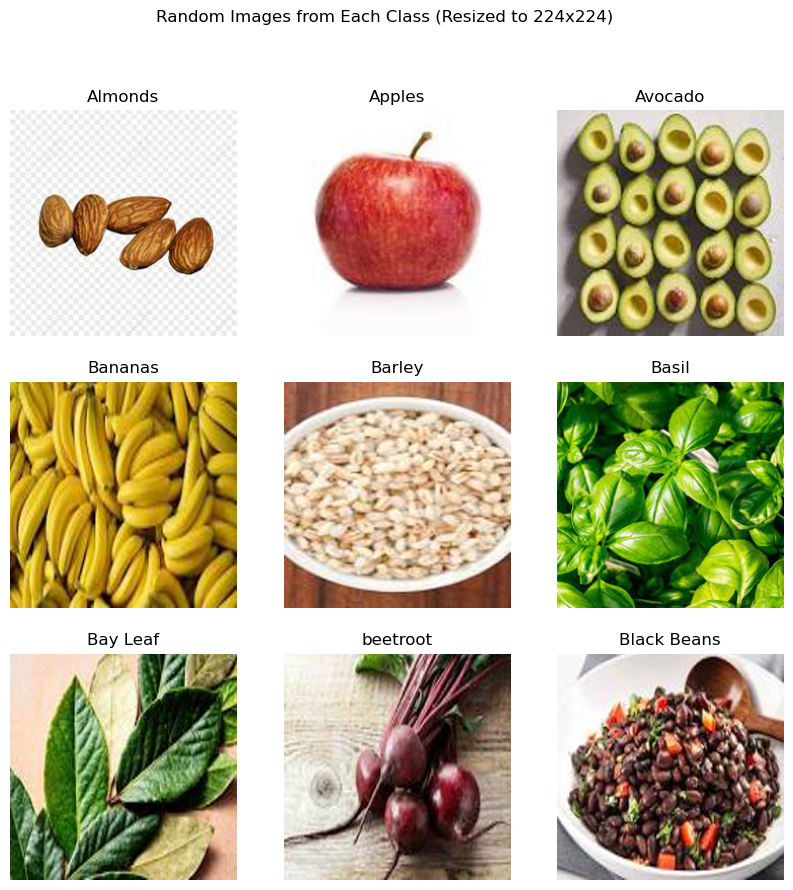

In [496]:
class_folders = os.listdir(dataset_path)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Random Images from Each Class (Resized to 224x224)')

for i, class_folder in enumerate(class_folders[:9]):  
    class_path = os.path.join(dataset_path, class_folder)
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    
    img = Image.open(image_path)
    img = img.resize((224, 224))
    
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].axis('off')
    axs[i // 3, i % 3].set_title(class_folder)

plt.show()

In [150]:
# Set parameters
img_size = (224, 224)
batch_size = 32

# Data preprocessing and Data augmentation

In [151]:
# Data preprocessing using ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [152]:
# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 4494 images belonging to 95 classes.
Found 1084 images belonging to 95 classes.


# EfficientNetB0 - model 1

In [154]:
# Build the EfficientNetB0 model
model_efficientnet = models.Sequential()
model_efficientnet.add(EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_efficientnet.add(layers.GlobalAveragePooling2D())
model_efficientnet.add(layers.Dense(95, activation='softmax'))  # Assuming 95 classes

# Compile the model
model_efficientnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

In [156]:
# Train the EfficientNetB0 model with data augmentation and learning rate scheduling
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
    callbacks=[reduce_lr]
)

Epoch 1/10
141/141 [==============================] - ETA: 0s - loss: 4.1840 - accuracy: 0.1195

C:\Users\ketak\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


141/141 [==============================] - 545s 4s/step - loss: 4.1840 - accuracy: 0.1195 - val_loss: 3.4871 - val_accuracy: 0.2629 - lr: 1.0000e-04
Epoch 2/10
141/141 [==============================] - 583s 4s/step - loss: 2.7915 - accuracy: 0.4410 - val_loss: 2.1898 - val_accuracy: 0.4917 - lr: 1.0000e-04
Epoch 3/10
141/141 [==============================] - 562s 4s/step - loss: 1.7643 - accuracy: 0.6264 - val_loss: 1.6135 - val_accuracy: 0.6006 - lr: 1.0000e-04
Epoch 4/10
141/141 [==============================] - 559s 4s/step - loss: 1.2219 - accuracy: 0.7332 - val_loss: 1.2384 - val_accuracy: 0.6946 - lr: 1.0000e-04
Epoch 5/10
141/141 [==============================] - 580s 4s/step - loss: 0.8848 - accuracy: 0.8071 - val_loss: 1.0695 - val_accuracy: 0.7417 - lr: 1.0000e-04
Epoch 6/10
141/141 [==============================] - 573s 4s/step - loss: 0.6773 - accuracy: 0.8565 - val_loss: 1.0033 - val_accuracy: 0.7574 - lr: 1.0000e-04
Epoch 7/10
141/141 [==============================]

# Evaluation of EfficientNetB0 model

# Validation accuracy

In [157]:
# Evaluate the model on the test set
eval_result_efficientnet = model_efficientnet.evaluate(validation_generator)
print("EfficientNetB0 Test accuracy:", eval_result_efficientnet[1])

34/34 [==============================] - 44s 1s/step - loss: 0.7880 - accuracy: 0.8081
EfficientNetB0 Test accuracy: 0.8081181049346924


# Print AUC graph for both dataset

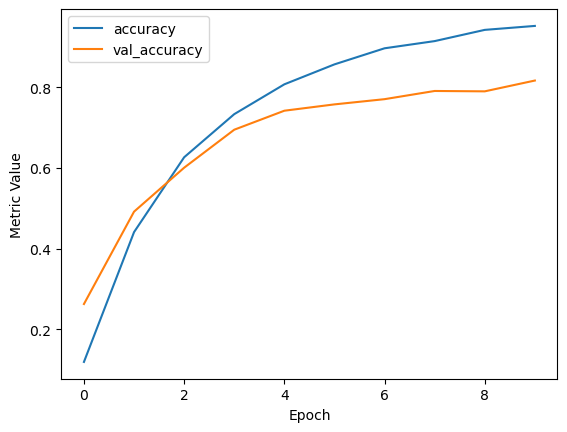

In [158]:
plt.plot(history_efficientnet.history['accuracy'], label='accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print loss graph for both dataset

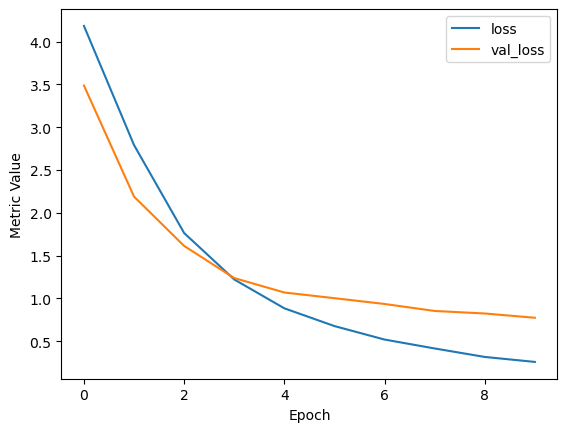

In [159]:
plt.plot(history_efficientnet.history['loss'], label='loss')
plt.plot(history_efficientnet.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print Classification Report

In [164]:
predictions = model_efficientnet.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

 1/34 [..............................] - ETA: 44s

C:\Users\ketak\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 [==============================] - 36s 1s/step
Classification Report:
                                precision    recall  f1-score   support

                       Almonds       1.00      0.73      0.84        11
                        Apples       0.88      0.64      0.74        11
                       Avocado       0.88      1.00      0.93        14
                       Bananas       0.81      0.93      0.87        14
                        Barley       0.73      1.00      0.85        11
                         Basil       0.92      1.00      0.96        12
                      Bay Leaf       1.00      0.91      0.95        11
                   Black Beans       0.87      1.00      0.93        13
Black Lentils (Beluga Lentils)       0.63      1.00      0.77        12
               Black-Eyed Peas       0.89      1.00      0.94         8
                   Brazil Nuts       0.85      1.00      0.92        11
                 Brown Lentils       0.72      0.93      0.

In [168]:
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix using heatmap

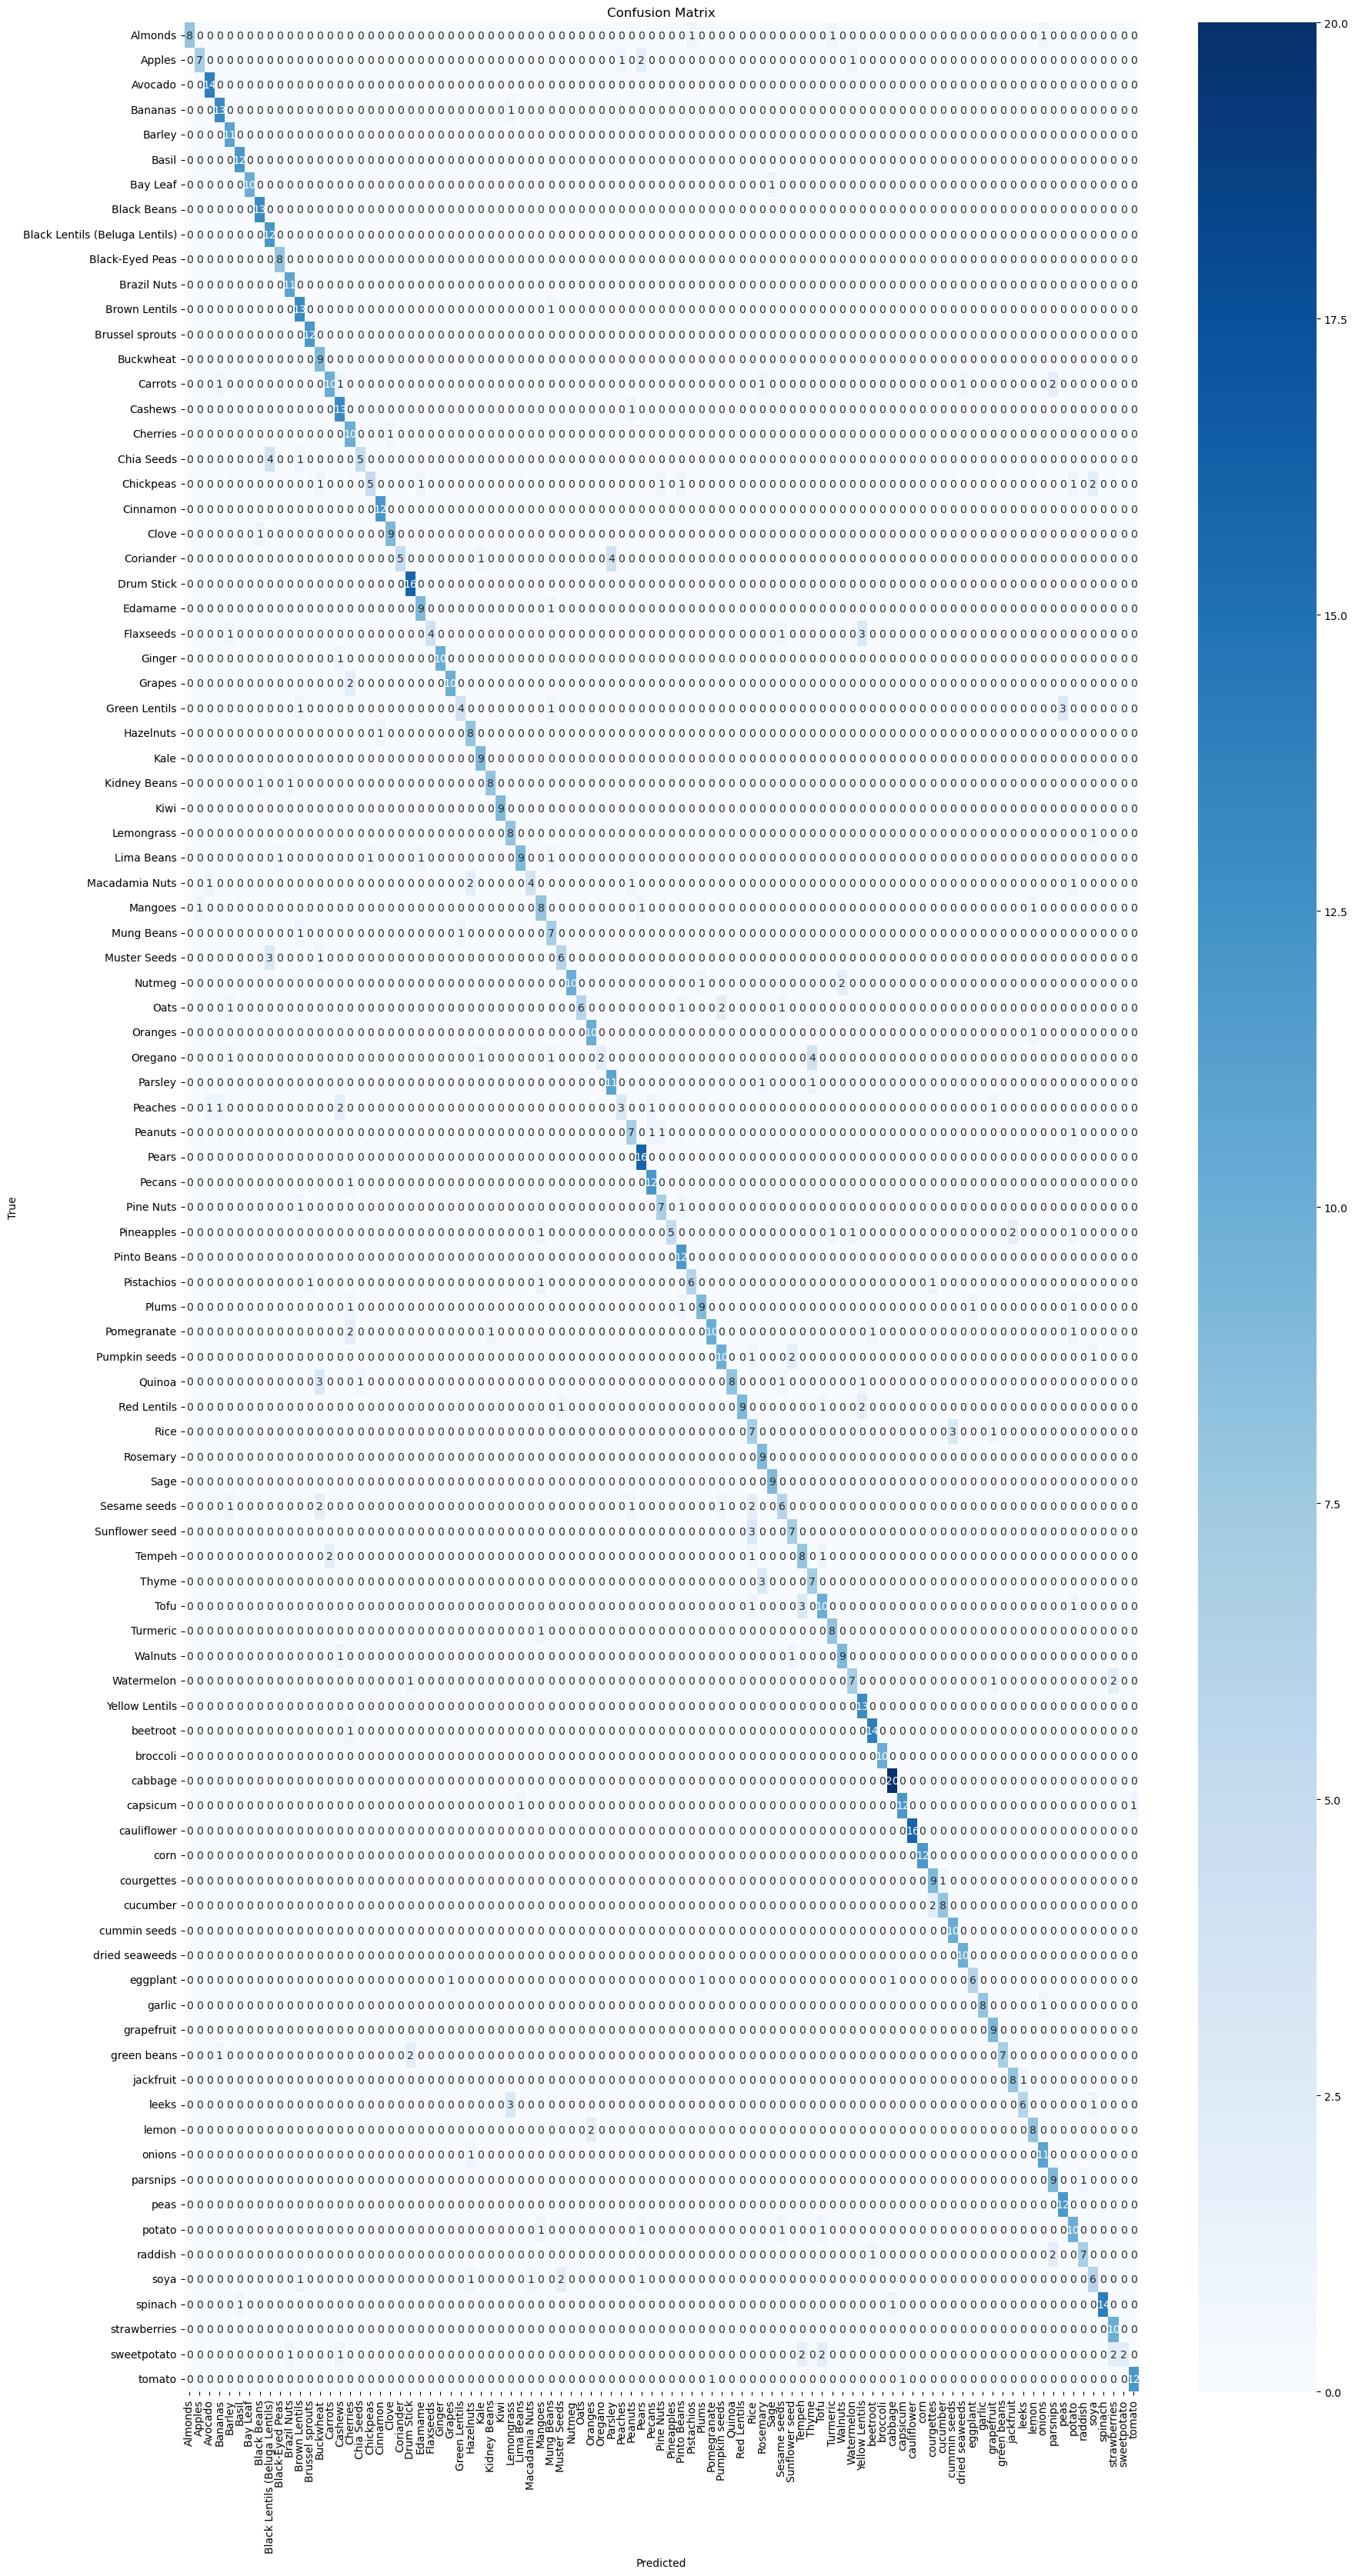

In [169]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 40))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print precision per class

In [170]:
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision per class:")
print(precision)

Precision per class:
[1.         0.875      0.875      0.8125     0.73333333 0.92307692
 1.         0.86666667 0.63157895 0.88888889 0.84615385 0.72222222
 0.92307692 0.5625     0.83333333 0.68421053 0.58823529 0.83333333
 0.83333333 0.92307692 0.9        1.         0.84210526 0.81818182
 1.         1.         0.90909091 0.8        0.66666667 0.81818182
 0.88888889 1.         0.66666667 0.9        0.8        0.66666667
 0.58333333 0.66666667 1.         1.         0.83333333 1.
 0.73333333 0.75       0.7        0.76190476 0.85714286 0.77777778
 1.         0.75       0.85714286 0.81818182 0.90909091 0.76923077
 1.         1.         0.46666667 0.64285714 0.9        0.6
 0.7        0.61538462 0.58333333 0.66666667 0.8        0.81818182
 0.77777778 0.68421053 0.875      1.         0.90909091 0.92307692
 1.         1.         0.75       0.88888889 0.76923077 0.90909091
 0.85714286 1.         0.75       1.         0.8        0.85714286
 0.8        0.84615385 0.69230769 0.8        0.58823529 

# Print recall per class

In [171]:
print("Recall per class:")
print(recall)

Recall per class:
[0.72727273 0.63636364 1.         0.92857143 1.         1.
 0.90909091 1.         1.         1.         1.         0.92857143
 1.         1.         0.625      0.92857143 0.90909091 0.5
 0.41666667 1.         0.9        0.5        1.         0.9
 0.44444444 0.90909091 0.83333333 0.44444444 0.88888889 1.
 0.8        1.         0.88888889 0.69230769 0.44444444 0.72727273
 0.77777778 0.6        0.76923077 0.54545455 0.90909091 0.22222222
 0.84615385 0.33333333 0.7        1.         0.92307692 0.77777778
 0.45454545 1.         0.66666667 0.69230769 0.66666667 0.71428571
 0.57142857 0.69230769 0.63636364 1.         1.         0.46153846
 0.7        0.66666667 0.7        0.66666667 0.88888889 0.81818182
 0.63636364 1.         0.93333333 1.         1.         0.85714286
 1.         1.         0.9        0.8        1.         1.
 0.66666667 0.88888889 1.         0.7        0.88888889 0.6
 0.8        0.91666667 0.9        1.         0.71428571 0.7
 0.5        0.875      1.    

# Print F1-score per class

In [172]:
print("F1 Score per class:")
print(f1_score)

F1 Score per class:
[0.84210526 0.73684211 0.93333333 0.86666667 0.84615385 0.96
 0.95238095 0.92857143 0.77419355 0.94117647 0.91666667 0.8125
 0.96       0.72       0.71428571 0.78787879 0.71428571 0.625
 0.55555556 0.96       0.9        0.66666667 0.91428571 0.85714286
 0.61538462 0.95238095 0.86956522 0.57142857 0.76190476 0.9
 0.84210526 1.         0.76190476 0.7826087  0.57142857 0.69565217
 0.66666667 0.63157895 0.86956522 0.70588235 0.86956522 0.36363636
 0.78571429 0.46153846 0.7        0.86486486 0.88888889 0.77777778
 0.625      0.85714286 0.75       0.75       0.76923077 0.74074074
 0.72727273 0.81818182 0.53846154 0.7826087  0.94736842 0.52173913
 0.7        0.64       0.63636364 0.66666667 0.84210526 0.81818182
 0.7        0.8125     0.90322581 1.         0.95238095 0.88888889
 1.         1.         0.81818182 0.84210526 0.86956522 0.95238095
 0.75       0.94117647 0.85714286 0.82352941 0.84210526 0.70588235
 0.8        0.88       0.7826087  0.88888889 0.64516129 0.777777

# Image Predication

1/1 [==============================] - 0s 253ms/step
The image is not classified as vegan.


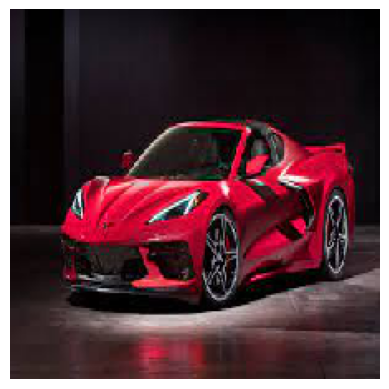

In [516]:
# Load and preprocess the image
img_path = 'download.jpg' 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the image

predictions = model_efficientnet.predict(img_array)

# Threshold for classification
threshold = 0.05  

# Check if the predicted probability is above the threshold
is_vegan = predictions[0][0] > threshold

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the result
if is_vegan:
    print("The image is classified as vegan.")
else:
    print("The image is not classified as vegan.")


# ResNet50 - model 2

In [201]:
# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(95, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [202]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Train the model with data augmentation and learning rate scheduling
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  
    callbacks=[reduce_lr]
)

Epoch 1/20
141/141 [==============================] - ETA: 0s - loss: 2.6498 - accuracy: 0.4097

C:\Users\ketak\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


141/141 [==============================] - 1212s 9s/step - loss: 2.6498 - accuracy: 0.4097 - val_loss: 1.8057 - val_accuracy: 0.5434 - lr: 1.0000e-04
Epoch 2/20
141/141 [==============================] - 1285s 9s/step - loss: 0.8150 - accuracy: 0.7948 - val_loss: 1.1817 - val_accuracy: 0.7020 - lr: 1.0000e-04
Epoch 3/20
141/141 [==============================] - 1326s 9s/step - loss: 0.4086 - accuracy: 0.8981 - val_loss: 1.1154 - val_accuracy: 0.7362 - lr: 1.0000e-04
Epoch 4/20
141/141 [==============================] - 1386s 10s/step - loss: 0.2696 - accuracy: 0.9366 - val_loss: 1.0180 - val_accuracy: 0.7583 - lr: 1.0000e-04
Epoch 5/20
141/141 [==============================] - 1355s 10s/step - loss: 0.1928 - accuracy: 0.9553 - val_loss: 1.1224 - val_accuracy: 0.7463 - lr: 1.0000e-04
Epoch 6/20
141/141 [==============================] - 1494s 11s/step - loss: 0.1263 - accuracy: 0.9684 - val_loss: 1.2826 - val_accuracy: 0.7288 - lr: 1.0000e-04
Epoch 7/20
141/141 [======================

# Evaluation of ResNet 50 model

# Validation accuracy

In [204]:
# Evaluate the model on the test set
eval_result = model.evaluate(validation_generator)
print("Test accuracy:", eval_result[1])

34/34 [==============================] - 83s 2s/step - loss: 0.8418 - accuracy: 0.8155
Test accuracy: 0.8154981732368469


# Print AUC graph for both dataset

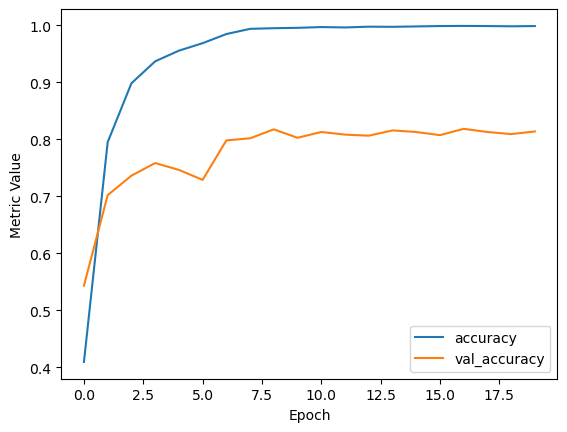

In [205]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print loss graph for both dataset

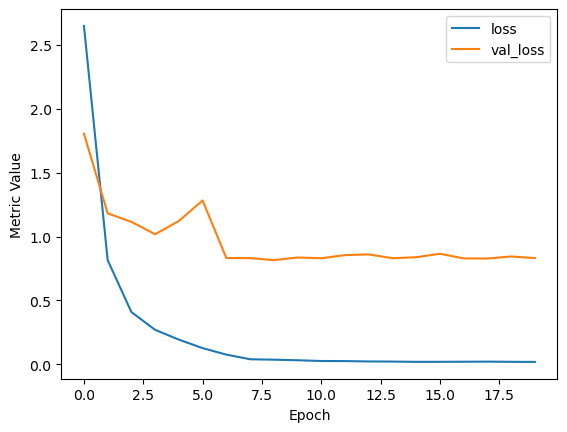

In [206]:
# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print Classification Report

In [207]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

34/34 [==============================] - 81s 2s/step
Classification Report:
                                precision    recall  f1-score   support

                       Almonds       0.91      0.91      0.91        11
                        Apples       1.00      0.64      0.78        11
                       Avocado       0.93      1.00      0.97        14
                       Bananas       0.86      0.86      0.86        14
                        Barley       0.71      0.91      0.80        11
                         Basil       1.00      1.00      1.00        12
                      Bay Leaf       0.92      1.00      0.96        11
                   Black Beans       0.81      1.00      0.90        13
Black Lentils (Beluga Lentils)       0.67      1.00      0.80        12
               Black-Eyed Peas       0.89      1.00      0.94         8
                   Brazil Nuts       0.73      1.00      0.85        11
                 Brown Lentils       0.82      1.00      0.

# Print confusion matrix using heatmap

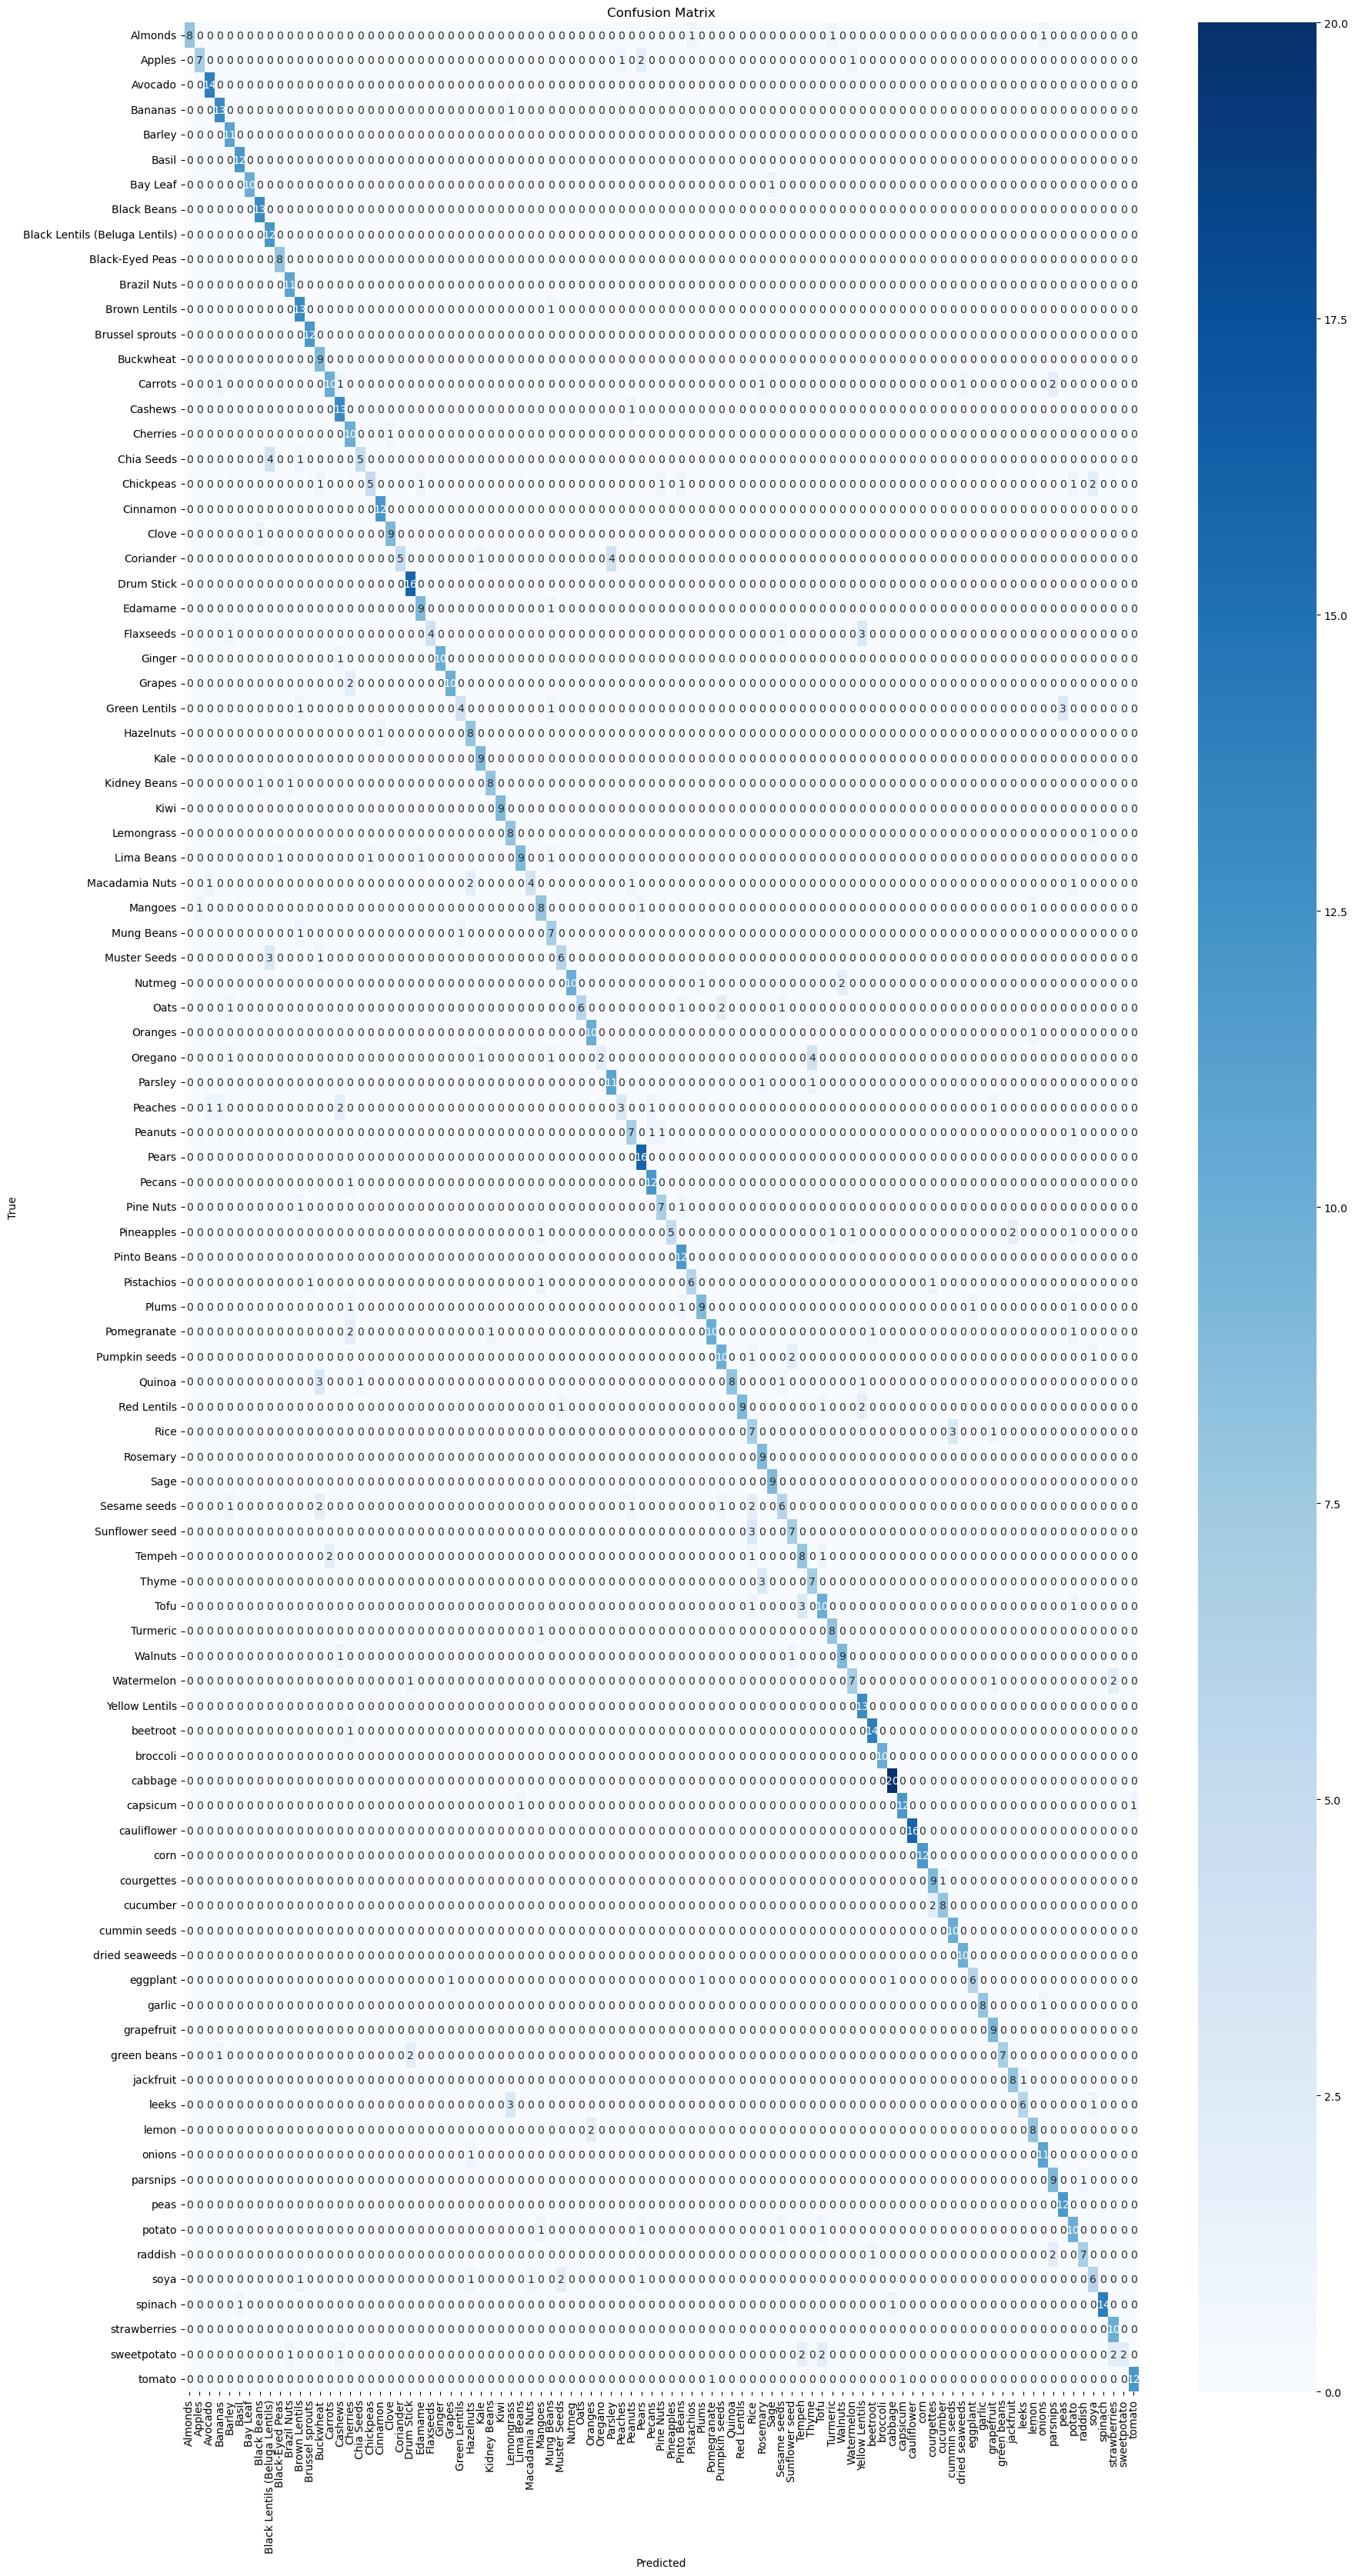

In [208]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 40))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print precision per class

In [209]:
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision per class:")
print(precision)

Precision per class:
[1.         0.875      0.875      0.8125     0.73333333 0.92307692
 1.         0.86666667 0.63157895 0.88888889 0.84615385 0.72222222
 0.92307692 0.5625     0.83333333 0.68421053 0.58823529 0.83333333
 0.83333333 0.92307692 0.9        1.         0.84210526 0.81818182
 1.         1.         0.90909091 0.8        0.66666667 0.81818182
 0.88888889 1.         0.66666667 0.9        0.8        0.66666667
 0.58333333 0.66666667 1.         1.         0.83333333 1.
 0.73333333 0.75       0.7        0.76190476 0.85714286 0.77777778
 1.         0.75       0.85714286 0.81818182 0.90909091 0.76923077
 1.         1.         0.46666667 0.64285714 0.9        0.6
 0.7        0.61538462 0.58333333 0.66666667 0.8        0.81818182
 0.77777778 0.68421053 0.875      1.         0.90909091 0.92307692
 1.         1.         0.75       0.88888889 0.76923077 0.90909091
 0.85714286 1.         0.75       1.         0.8        0.85714286
 0.8        0.84615385 0.69230769 0.8        0.58823529 

# Print recall per class

In [210]:
print("Recall per class:")
print(recall)

Recall per class:
[0.72727273 0.63636364 1.         0.92857143 1.         1.
 0.90909091 1.         1.         1.         1.         0.92857143
 1.         1.         0.625      0.92857143 0.90909091 0.5
 0.41666667 1.         0.9        0.5        1.         0.9
 0.44444444 0.90909091 0.83333333 0.44444444 0.88888889 1.
 0.8        1.         0.88888889 0.69230769 0.44444444 0.72727273
 0.77777778 0.6        0.76923077 0.54545455 0.90909091 0.22222222
 0.84615385 0.33333333 0.7        1.         0.92307692 0.77777778
 0.45454545 1.         0.66666667 0.69230769 0.66666667 0.71428571
 0.57142857 0.69230769 0.63636364 1.         1.         0.46153846
 0.7        0.66666667 0.7        0.66666667 0.88888889 0.81818182
 0.63636364 1.         0.93333333 1.         1.         0.85714286
 1.         1.         0.9        0.8        1.         1.
 0.66666667 0.88888889 1.         0.7        0.88888889 0.6
 0.8        0.91666667 0.9        1.         0.71428571 0.7
 0.5        0.875      1.    

# Print F1-score per class

In [211]:
print("F1 Score per class:")
print(f1_score)

F1 Score per class:
[0.84210526 0.73684211 0.93333333 0.86666667 0.84615385 0.96
 0.95238095 0.92857143 0.77419355 0.94117647 0.91666667 0.8125
 0.96       0.72       0.71428571 0.78787879 0.71428571 0.625
 0.55555556 0.96       0.9        0.66666667 0.91428571 0.85714286
 0.61538462 0.95238095 0.86956522 0.57142857 0.76190476 0.9
 0.84210526 1.         0.76190476 0.7826087  0.57142857 0.69565217
 0.66666667 0.63157895 0.86956522 0.70588235 0.86956522 0.36363636
 0.78571429 0.46153846 0.7        0.86486486 0.88888889 0.77777778
 0.625      0.85714286 0.75       0.75       0.76923077 0.74074074
 0.72727273 0.81818182 0.53846154 0.7826087  0.94736842 0.52173913
 0.7        0.64       0.63636364 0.66666667 0.84210526 0.81818182
 0.7        0.8125     0.90322581 1.         0.95238095 0.88888889
 1.         1.         0.81818182 0.84210526 0.86956522 0.95238095
 0.75       0.94117647 0.85714286 0.82352941 0.84210526 0.70588235
 0.8        0.88       0.7826087  0.88888889 0.64516129 0.777777

# Image Predication

1/1 [==============================] - 0s 274ms/step
The image is classified as vegan.


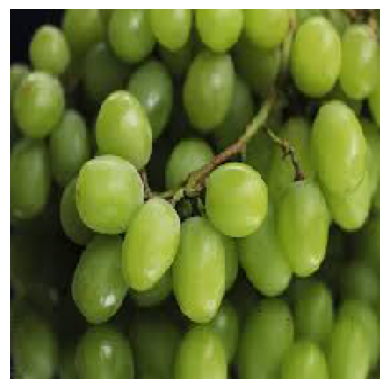

In [517]:
# Load and preprocess the image
img_path = '100.jpg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  

# Make predictions
predictions = model.predict(img_array)

threshold = 0.005  

# Check if the predicted probability is above the threshold
is_vegan = predictions[0][0] > threshold

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the result
if is_vegan:
    print("The image is classified as vegan.")
else:
    print("The image is not classified as vegan.")

# Inception V3 - model 3

In [231]:
# Build the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_inception = models.Sequential()
model_inception.add(base_model)
model_inception.add(layers.GlobalAveragePooling2D())
model_inception.add(layers.Dense(95, activation='softmax'))

In [232]:
model_inception.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [233]:
history_inception = model_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
    callbacks=[reduce_lr]
)

Epoch 1/10
141/141 [==============================] - ETA: 0s - loss: 3.2814 - accuracy: 0.3013

C:\Users\ketak\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


141/141 [==============================] - 821s 6s/step - loss: 3.2814 - accuracy: 0.3013 - val_loss: 2.1114 - val_accuracy: 0.4834 - lr: 1.0000e-04
Epoch 2/10
141/141 [==============================] - 870s 6s/step - loss: 1.3667 - accuracy: 0.6860 - val_loss: 1.3886 - val_accuracy: 0.6402 - lr: 1.0000e-04
Epoch 3/10
141/141 [==============================] - 807s 6s/step - loss: 0.7629 - accuracy: 0.8155 - val_loss: 1.0670 - val_accuracy: 0.7315 - lr: 1.0000e-04
Epoch 4/10
141/141 [==============================] - 845s 6s/step - loss: 0.4604 - accuracy: 0.8927 - val_loss: 1.0226 - val_accuracy: 0.7472 - lr: 1.0000e-04
Epoch 5/10
141/141 [==============================] - 892s 6s/step - loss: 0.3096 - accuracy: 0.9295 - val_loss: 0.9927 - val_accuracy: 0.7565 - lr: 1.0000e-04
Epoch 6/10
141/141 [==============================] - 893s 6s/step - loss: 0.2290 - accuracy: 0.9462 - val_loss: 1.0672 - val_accuracy: 0.7380 - lr: 1.0000e-04
Epoch 7/10
141/141 [==============================]

# Evaluation of Inception V3 model

# Validation accuracy

In [234]:
# Evaluate the model on the test set
eval_result = model_inception.evaluate(validation_generator)
print("InceptionV3 Test accuracy:", eval_result[1])

34/34 [==============================] - 47s 1s/step - loss: 0.8781 - accuracy: 0.7943
InceptionV3 Test accuracy: 0.794280469417572


# Print AUC graph for both dataset

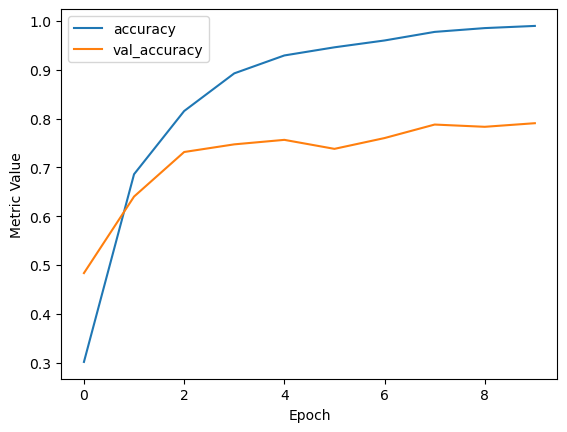

In [235]:
# Plot training history
plt.plot(history_inception.history['accuracy'], label='accuracy')
plt.plot(history_inception.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print loss graph for both dataset

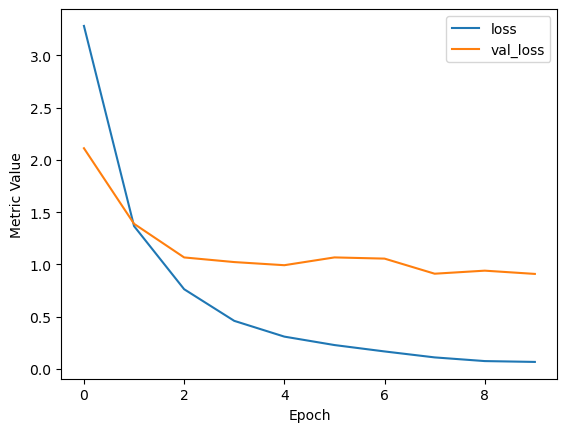

In [238]:
# Plot training history
plt.plot(history_inception.history['loss'], label='loss')
plt.plot(history_inception.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print Classification Report

In [239]:
predictions = model_inception.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))  

34/34 [==============================] - 50s 1s/step
Classification Report:
                                precision    recall  f1-score   support

                       Almonds       0.73      1.00      0.85        11
                        Apples       0.86      0.55      0.67        11
                       Avocado       0.93      1.00      0.97        14
                       Bananas       0.87      0.93      0.90        14
                        Barley       0.73      0.73      0.73        11
                         Basil       1.00      0.92      0.96        12
                      Bay Leaf       0.79      1.00      0.88        11
                   Black Beans       0.92      0.92      0.92        13
Black Lentils (Beluga Lentils)       0.65      0.92      0.76        12
               Black-Eyed Peas       0.89      1.00      0.94         8
                   Brazil Nuts       0.67      0.91      0.77        11
                 Brown Lentils       0.65      0.93      0.

In [240]:
conf_mat1 = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix using heatmap

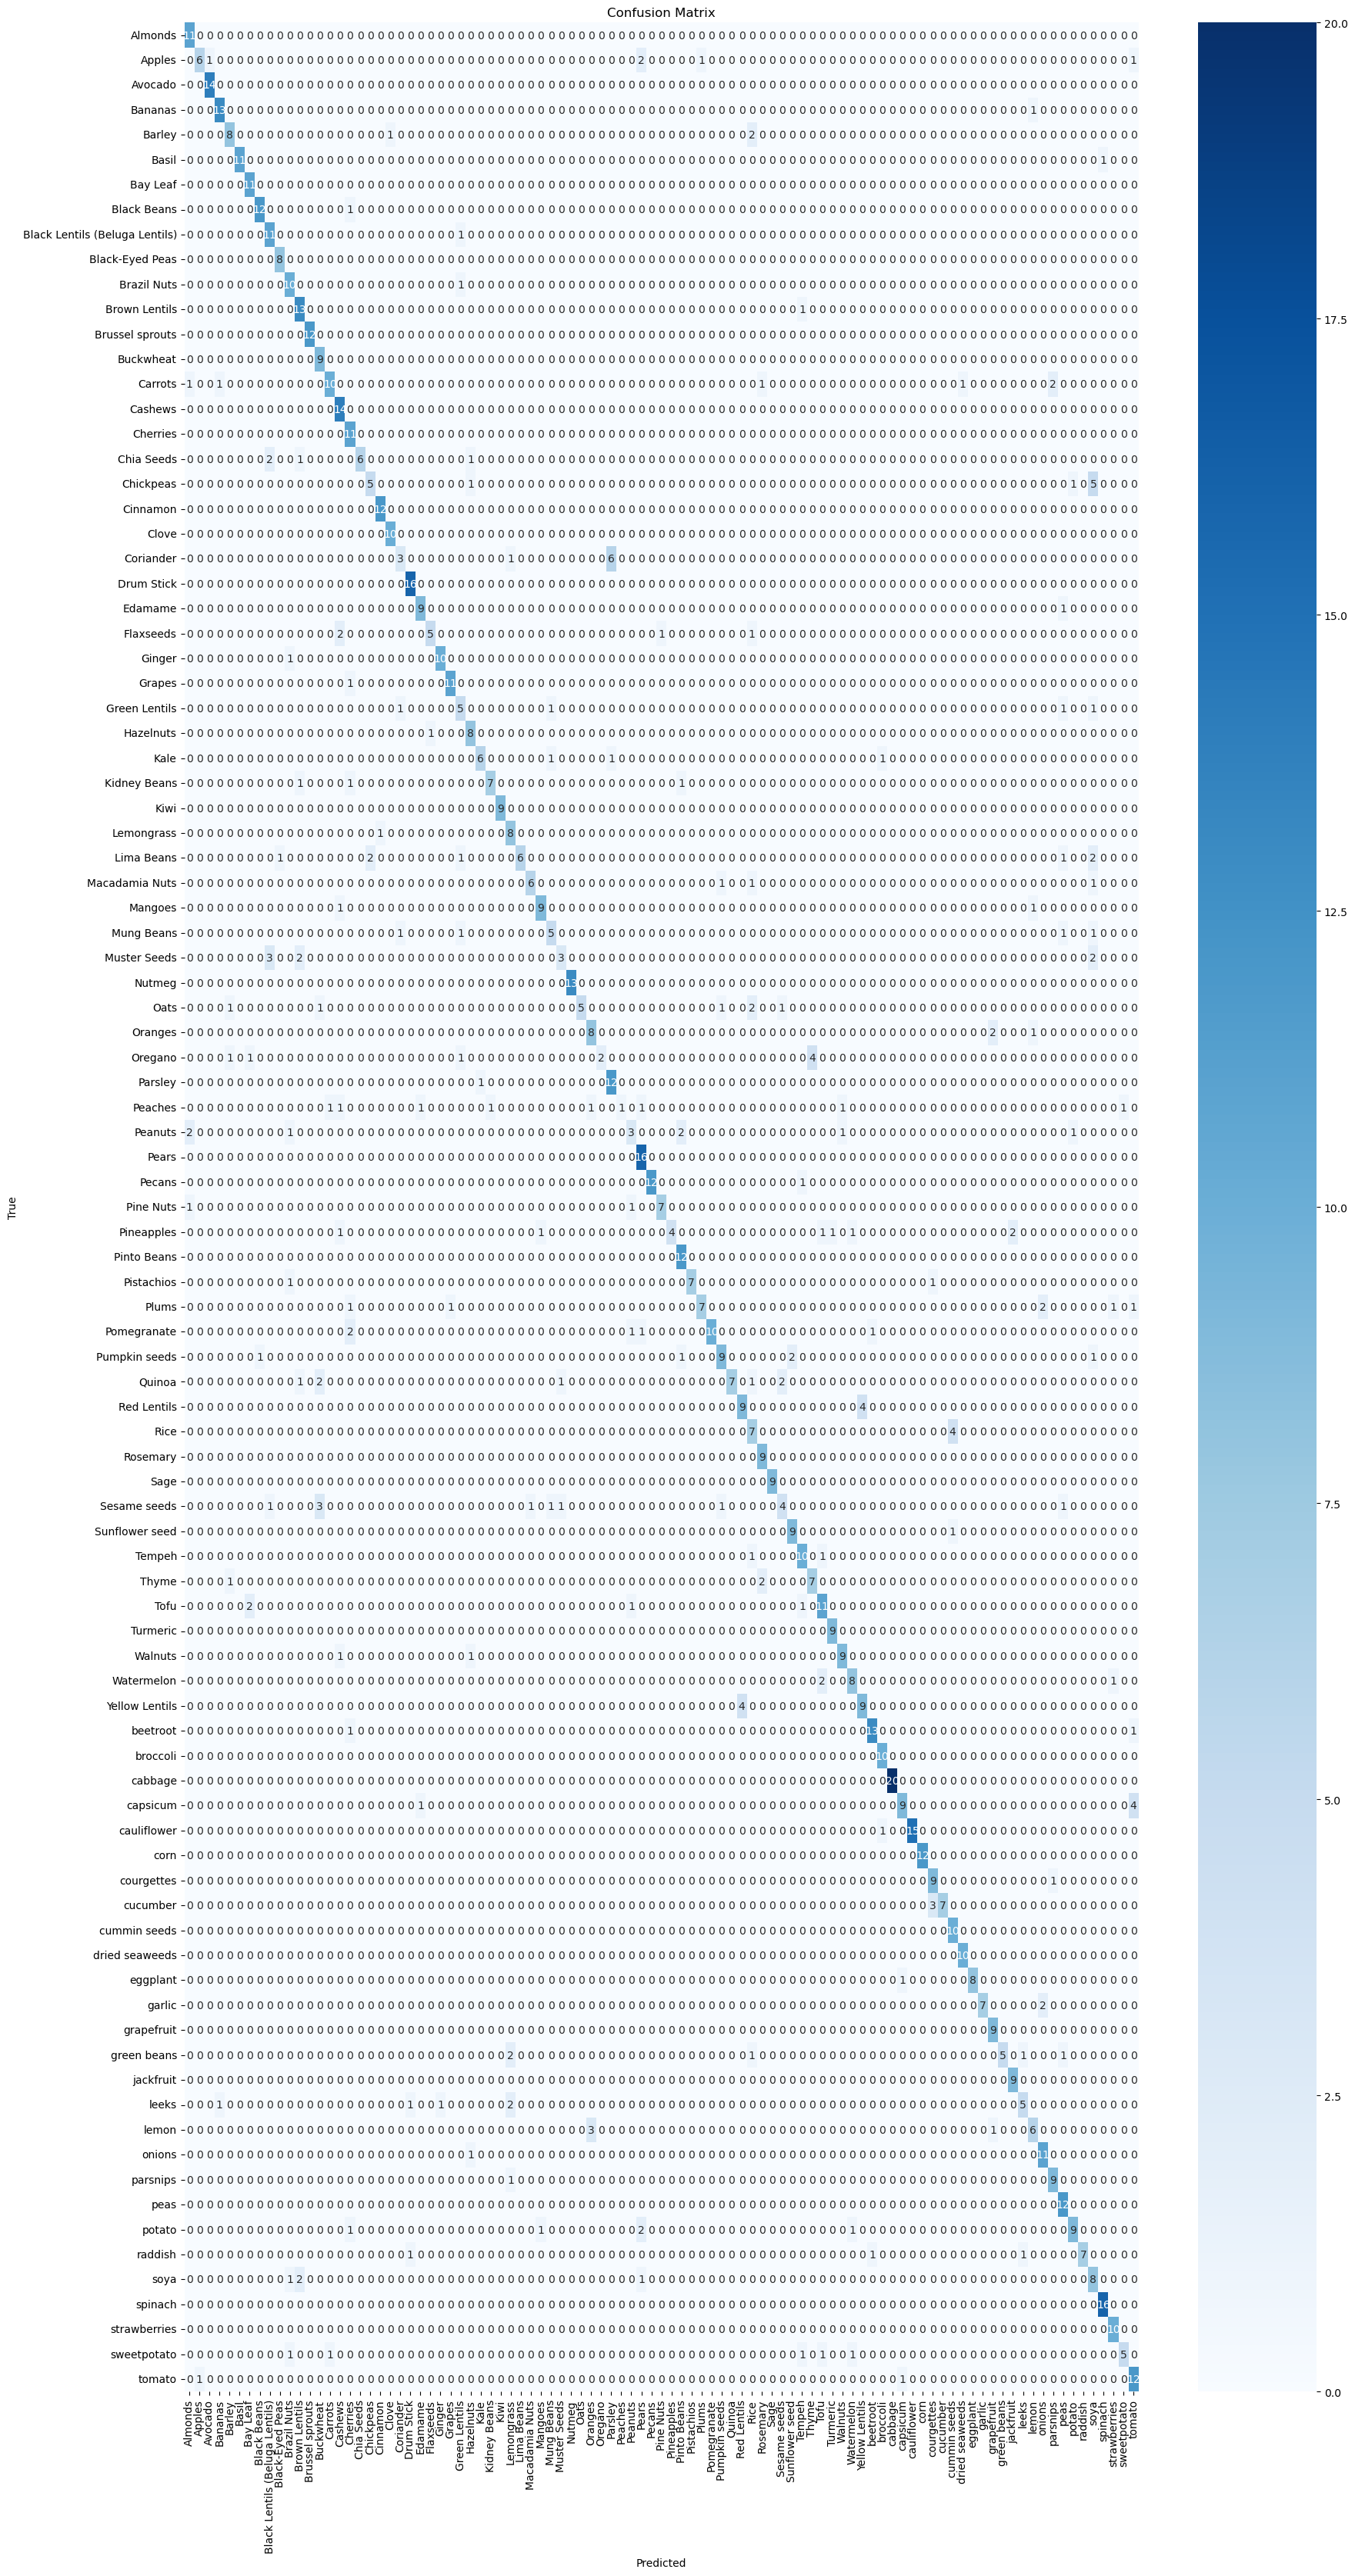

In [241]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 40))
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print precision per class

In [242]:
precision = np.diag(conf_mat1) / np.sum(conf_mat1, axis=0)
recall = np.diag(conf_mat1) / np.sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision per class:")
print(precision)

Precision per class:
[0.73333333 0.85714286 0.93333333 0.86666667 0.72727273 1.
 0.78571429 0.92307692 0.64705882 0.88888889 0.66666667 0.65
 1.         0.6        0.83333333 0.7        0.57894737 1.
 0.71428571 0.92307692 0.90909091 0.6        0.88888889 0.81818182
 0.83333333 0.90909091 0.91666667 0.5        0.66666667 0.85714286
 0.875      1.         0.57142857 1.         0.85714286 0.81818182
 0.625      0.6        1.         1.         0.66666667 1.
 0.63157895 1.         0.5        0.69565217 1.         0.875
 1.         0.75       1.         0.875      1.         0.75
 1.         0.69230769 0.4375     0.75       1.         0.57142857
 0.81818182 0.71428571 0.63636364 0.6875     0.9        0.81818182
 0.72727273 0.69230769 0.86666667 0.83333333 1.         0.81818182
 1.         1.         0.69230769 1.         0.66666667 0.90909091
 1.         1.         0.75       1.         0.81818182 0.71428571
 0.66666667 0.73333333 0.75       0.66666667 0.81818182 1.
 0.38095238 0.94117647 

# Print recall per class

In [243]:
print("Recall per class:")
print(recall)

Recall per class:
[1.         0.54545455 1.         0.92857143 0.72727273 0.91666667
 1.         0.92307692 0.91666667 1.         0.90909091 0.92857143
 1.         1.         0.625      1.         1.         0.6
 0.41666667 1.         1.         0.3        1.         0.9
 0.55555556 0.90909091 0.91666667 0.55555556 0.88888889 0.66666667
 0.7        1.         0.88888889 0.46153846 0.66666667 0.81818182
 0.55555556 0.3        1.         0.45454545 0.72727273 0.22222222
 0.92307692 0.11111111 0.3        1.         0.92307692 0.77777778
 0.36363636 1.         0.77777778 0.53846154 0.66666667 0.64285714
 0.5        0.69230769 0.63636364 1.         1.         0.30769231
 0.9        0.83333333 0.7        0.73333333 1.         0.81818182
 0.72727273 0.69230769 0.86666667 1.         1.         0.64285714
 0.9375     1.         0.9        0.7        1.         1.
 0.88888889 0.77777778 1.         0.5        1.         0.5
 0.6        0.91666667 0.9        1.         0.64285714 0.7
 0.66666667 1

# Print F1-score per class

In [244]:
print("F1 Score per class:")
print(f1_score)

F1 Score per class:
[0.84615385 0.66666667 0.96551724 0.89655172 0.72727273 0.95652174
 0.88       0.92307692 0.75862069 0.94117647 0.76923077 0.76470588
 1.         0.75       0.71428571 0.82352941 0.73333333 0.75
 0.52631579 0.96       0.95238095 0.4        0.94117647 0.85714286
 0.66666667 0.90909091 0.91666667 0.52631579 0.76190476 0.75
 0.77777778 1.         0.69565217 0.63157895 0.75       0.81818182
 0.58823529 0.4        1.         0.625      0.69565217 0.36363636
 0.75       0.2        0.375      0.82051282 0.96       0.82352941
 0.53333333 0.85714286 0.875      0.66666667 0.8        0.69230769
 0.66666667 0.69230769 0.51851852 0.85714286 1.         0.4
 0.85714286 0.76923077 0.66666667 0.70967742 0.94736842 0.81818182
 0.72727273 0.69230769 0.86666667 0.90909091 1.         0.72
 0.96774194 1.         0.7826087  0.82352941 0.8        0.95238095
 0.94117647 0.875      0.85714286 0.66666667 0.9        0.58823529
 0.63157895 0.81481481 0.81818182 0.8        0.72       0.82352941


# Image Predication

1/1 [==============================] - 0s 187ms/step


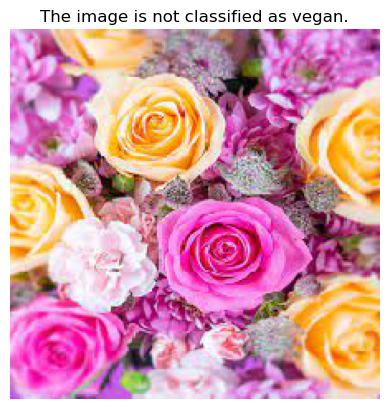

In [518]:
img_path = 'f.jpg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. 

predictions = model_inception.predict(img_array)

# Threshold for classification
threshold = 0.05 

is_vegan = predictions[0][0] > threshold

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the result
if is_vegan:
    plt.title("The image is classified as vegan.")
else:
    plt.title("The image is not classified as vegan.")

# Show the image with the result
plt.show()

# Inception V3 -  model 4

In [413]:
# Get the list of all image file paths
all_image_paths = [os.path.join(dataset_path, class_folder, img_name)
                   for class_folder in os.listdir(dataset_path)
                   for img_name in os.listdir(os.path.join(dataset_path, class_folder))]

# Get corresponding labels based on folder names
all_labels = [class_folder for class_folder in os.listdir(dataset_path)
              for _ in os.listdir(os.path.join(dataset_path, class_folder))]

LabelEncoder to convert string labels to integers

In [416]:
# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# One-hot encode labels
all_labels_encoded = to_categorical(all_labels_encoded, num_classes=95)

In [417]:
# Split the data into training and validation sets
train_paths, validation_paths, train_labels, validation_labels = train_test_split(
    all_image_paths, all_labels_encoded, test_size=0.2, random_state=42, stratify=all_labels_encoded
)

Pre-processing function

In [418]:
def preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)
    img = preprocess_input(img)
    return img, label

In [419]:
# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_paths, validation_labels))

In [420]:
# Load and preprocess images
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [421]:
# Batch and shuffle the datasets
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size)

In [422]:
# Build the InceptionV3 model
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_inception1 = models.Sequential()
model_inception1.add(base_model1)
model_inception1.add(layers.GlobalAveragePooling2D())
model_inception1.add(layers.Dense(95, activation='softmax'))

In [423]:
model_inception1.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [424]:
# Train the model
history_inception1 = model_inception1.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
140/140 [==============================] - 923s 6s/step - loss: 2.8324 - accuracy: 0.4356 - val_loss: 1.3347 - val_accuracy: 0.6855
Epoch 2/10
140/140 [==============================] - 1053s 7s/step - loss: 0.6548 - accuracy: 0.8906 - val_loss: 0.5808 - val_accuracy: 0.8701
Epoch 3/10
140/140 [==============================] - 1058s 7s/step - loss: 0.1973 - accuracy: 0.9724 - val_loss: 0.4173 - val_accuracy: 0.9014
Epoch 4/10
140/140 [==============================] - 1143s 8s/step - loss: 0.0889 - accuracy: 0.9890 - val_loss: 0.3812 - val_accuracy: 0.9113
Epoch 5/10
140/140 [==============================] - 1143s 8s/step - loss: 0.0507 - accuracy: 0.9944 - val_loss: 0.3611 - val_accuracy: 0.9131
Epoch 6/10
140/140 [==============================] - 1122s 8s/step - loss: 0.0349 - accuracy: 0.9960 - val_loss: 0.3827 - val_accuracy: 0.9077
Epoch 7/10
140/140 [==============================] - 1029s 7s/step - loss: 0.0203 - accuracy: 0.9973 - val_loss: 0.3664 - val_accuracy: 

# Evaluation of Inception V3 model

# Validation accuracy

In [427]:
# Evaluate the model on the test set
eval_result_inception1 = model_inception1.evaluate(validation_dataset)
print("EfficientNetB0 Test accuracy:", eval_result_efficientnet[1])

35/35 [==============================] - 36s 1s/step - loss: 0.4361 - accuracy: 0.8943
EfficientNetB0 Test accuracy: 0.8942652344703674


# Print AUC graph for both dataset

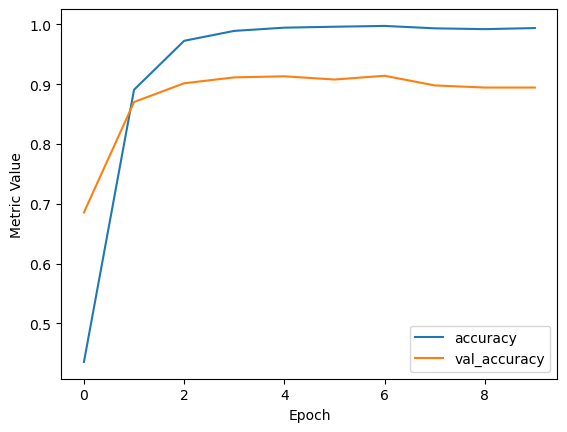

In [428]:
# Plot training history
plt.plot(history_inception1.history['accuracy'], label='accuracy')
plt.plot(history_inception1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print loss graph for both dataset

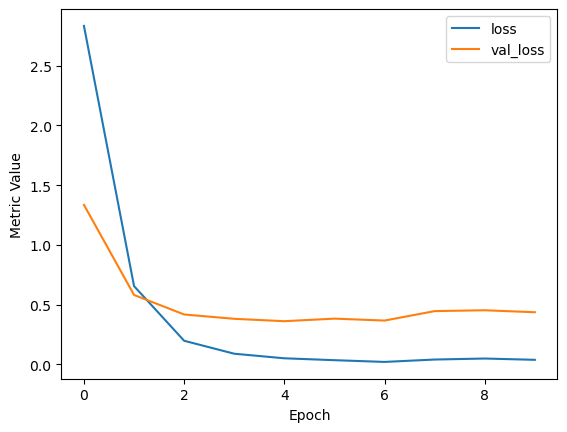

In [429]:
# Plot training history
plt.plot(history_inception1.history['loss'], label='loss')
plt.plot(history_inception1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Print Classification Report

In [448]:
predictions = model_inception1.predict(validation_dataset)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(validation_labels, axis=1)

decoded_true_classes = label_encoder.inverse_transform(true_classes)
decoded_predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print Classification Report
print("Classification Report:")
print(classification_report(decoded_true_classes, decoded_predicted_classes))

35/35 [==============================] - 27s 772ms/step
Classification Report:
                                precision    recall  f1-score   support

                       Almonds       0.92      1.00      0.96        11
                        Apples       0.92      0.92      0.92        12
                       Avocado       1.00      1.00      1.00        15
                       Bananas       1.00      0.80      0.89        15
                        Barley       1.00      0.67      0.80        12
                         Basil       0.67      1.00      0.80        12
                      Bay Leaf       1.00      0.75      0.86        12
                   Black Beans       0.87      0.93      0.90        14
Black Lentils (Beluga Lentils)       0.91      0.83      0.87        12
               Black-Eyed Peas       0.78      0.88      0.82         8
                   Brazil Nuts       1.00      0.92      0.96        12
                 Brown Lentils       0.83      1.00     

In [449]:
conf_mat2 = confusion_matrix(true_classes, predicted_classes)

In [460]:
print(true_classes)

[90 13 29  9 56 14 72 11 80 24 56  2 13 68 14 50 19 16 60 24 73 29 54 37
 52 92 61 63 18 64 51 45 26 44 56  2 70 49  7 18 63 26 18 49 91 91 67 70
 57 48 25 24 81 22 59 44 86 22 88 59 56  6 53  4 33 74 45 21 83 41 72 47
 81 57 91 38 53  5 81 30 36 65 11 38 78 15  2 87 46 92 54 49 48 45 87  1
 23 86 53 65  2 12 29  5 52 20 63 86 81  6 24 68  9 11  2 42 51 94 16 56
 65 83 75 39 49 53  8 20 39 72 15 33 30  6 78  8 28  2 72  5 64 30  4 22
 51 14 46 81 47 45 40  5 91 85 16 69 19 79 13 21 93 15 21 72 61 79 23 64
 27 51 89 58 45 11 57 35 38  0 70 93 72 50 39 71 68 77  5 72 21 84 68 83
 42  0 68 53 58  6 68 76 88 40 25  4 70 32 30 93 28 91 61 58 18 57 50 46
 45 10 77 51 22 92 11 15 73 30 19 22 66 13 76  8 90 25 56 42  7 74 50  3
 79 88 10 35 86 94 19  7 88 63 47 50 61 55 74 41 14  4 51 63 82 59 37 74
 44 36 41 93 80 33 63  1 42 11  5 17 59 55 66 51  3 40 88 20 71 45 60 53
 71 12  4 35 46 15 41 39 72 33 60 54 14  3 77 53 62  7 60 72 21 54 76 27
 66 75 76 72  4  3 64 41  4 87 46 36 83 90  9 51 87

In [461]:
predicted_classes

array([90, 13, 29,  9, 56, 14, 72, 11, 80, 24, 56,  2, 54, 68, 14, 50, 19,
       16, 60, 24, 73, 29, 54, 37, 52, 92, 39, 63, 18, 64, 51, 45, 26, 44,
       56,  2, 70, 49,  7, 90, 63, 16, 18, 49, 91, 91, 67, 70, 57, 48, 25,
       24, 81, 22, 59, 59, 86, 22, 88, 59, 56, 58, 53,  4, 33, 74, 45, 21,
       83, 41, 72, 47, 81, 57, 91, 38, 53,  5, 81, 30, 36, 65, 11, 38, 78,
       15,  2, 87, 46, 92, 54, 49, 48, 45, 87,  1, 23, 86, 53, 65,  2, 12,
       69,  5, 52, 20, 63, 89, 81, 58, 24, 68,  9, 11,  2, 42, 51, 94, 16,
       56, 65, 83, 75, 39, 49, 53,  7, 20, 39, 72, 15, 33, 30,  6, 78,  8,
       28,  2, 72,  5, 64, 30,  4, 22, 51, 14, 46, 81, 47, 45, 40,  5, 91,
       85, 16, 69, 19, 79, 13, 91, 93, 79, 21, 72, 61, 79, 23, 64, 27, 51,
       89, 58, 45, 11, 57, 35, 41,  0, 70, 93, 72, 50, 39, 71, 16, 77,  5,
       72, 21, 84, 68, 83, 42,  0, 68, 53, 58, 58, 68, 76, 88, 40, 53,  4,
       70, 32, 30, 93, 24, 91, 61, 58, 18, 57, 50, 46, 45, 10, 77, 16, 22,
       92, 11, 15, 73, 30

# Print confusion matrix using heatmap

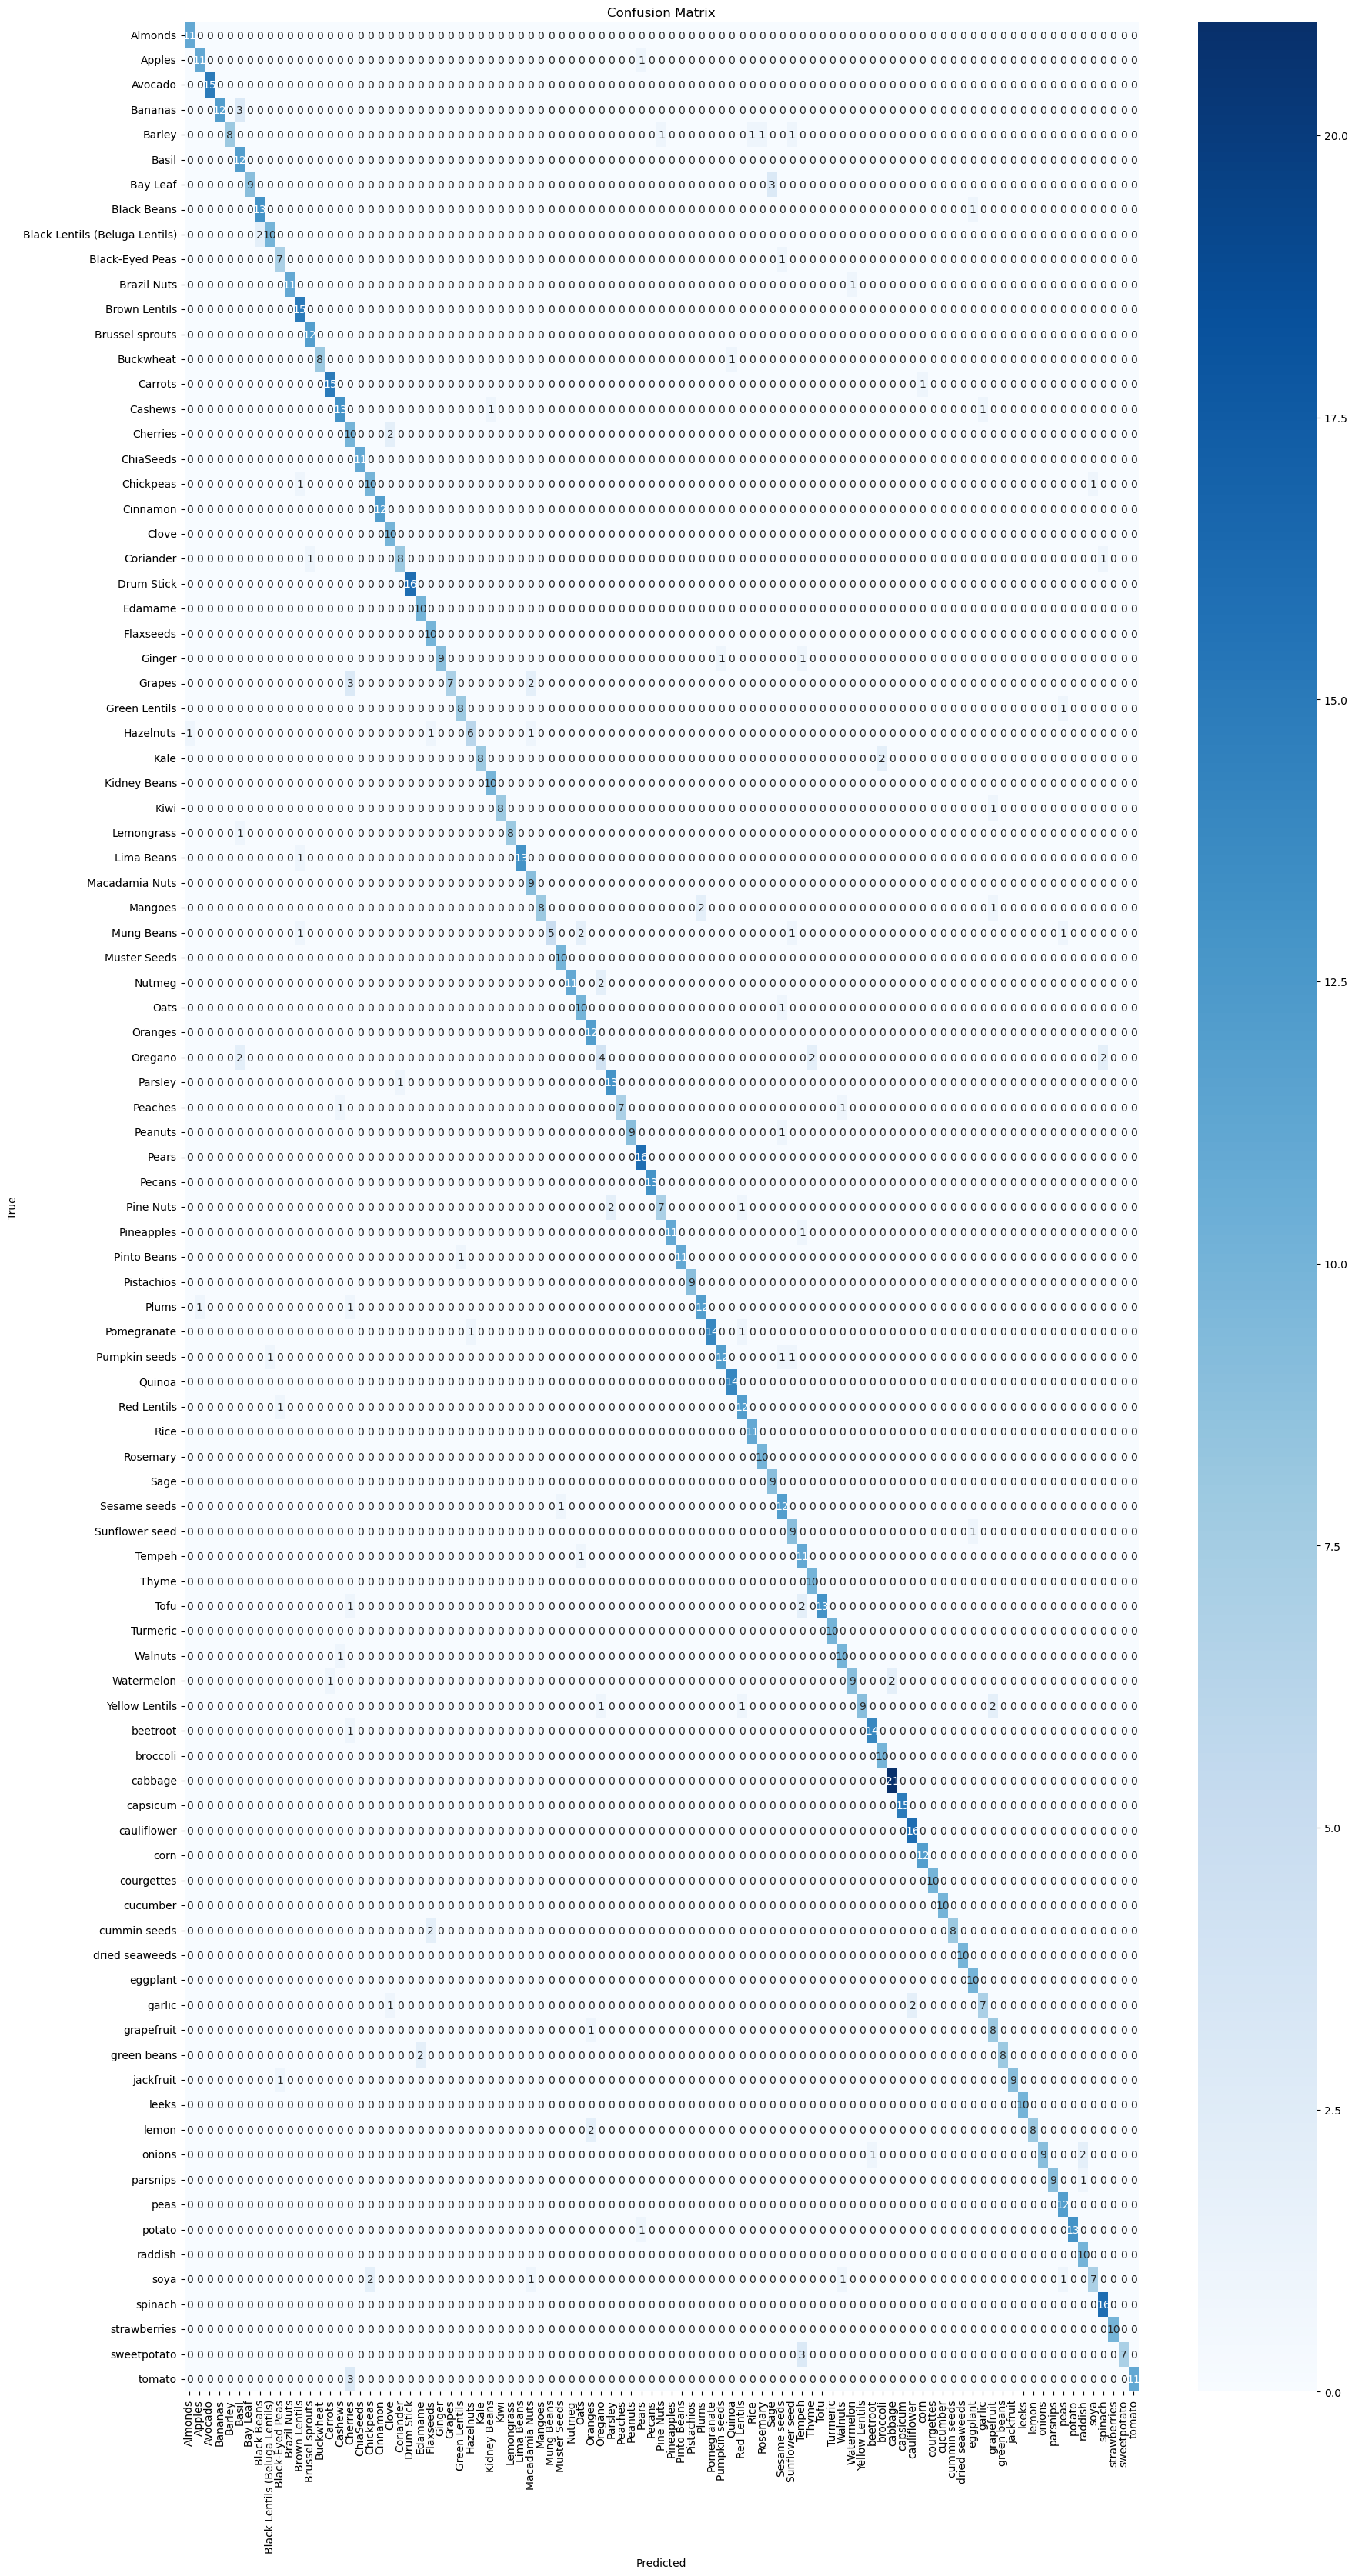

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 40))
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print precision per class

In [451]:
precision = np.diag(conf_mat2) / np.sum(conf_mat2, axis=0)
recall = np.diag(conf_mat2) / np.sum(conf_mat2, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision per class:")
print(precision)

Precision per class:
[0.91666667 0.91666667 1.         1.         1.         0.66666667
 1.         0.86666667 0.90909091 0.77777778 1.         0.83333333
 0.92307692 1.         0.9375     0.86666667 0.52631579 1.
 0.83333333 1.         0.76923077 0.88888889 1.         0.83333333
 0.76923077 1.         1.         0.88888889 0.85714286 1.
 0.90909091 1.         1.         1.         0.69230769 1.
 1.         0.90909091 1.         0.76923077 0.8        0.57142857
 0.86666667 1.         1.         0.88888889 1.         0.875
 1.         1.         1.         0.85714286 1.         0.92307692
 0.93333333 0.8        0.91666667 0.90909091 0.75       0.75
 0.75       0.61111111 0.83333333 1.         1.         0.83333333
 0.9        1.         0.93333333 0.83333333 0.91304348 1.
 0.88888889 0.92307692 1.         1.         1.         1.
 0.83333333 0.875      0.66666667 1.         1.         1.
 1.         1.         1.         0.8        1.         0.76923077
 0.875      0.84210526 1.        

# Print recall per class

In [452]:
print("Recall per class:")
print(recall)

Recall per class:
[1.         0.91666667 1.         0.8        0.66666667 1.
 0.75       0.92857143 0.83333333 0.875      0.91666667 1.
 1.         0.88888889 0.9375     0.86666667 0.83333333 1.
 0.83333333 1.         1.         0.8        1.         1.
 1.         0.81818182 0.58333333 0.88888889 0.66666667 0.8
 1.         0.88888889 0.88888889 0.92857143 1.         0.72727273
 0.5        1.         0.84615385 0.90909091 1.         0.4
 0.92857143 0.77777778 0.9        1.         1.         0.7
 0.91666667 0.91666667 1.         0.85714286 0.875      0.8
 1.         0.92307692 1.         1.         1.         0.92307692
 0.9        0.91666667 1.         0.8125     1.         0.90909091
 0.75       0.69230769 0.93333333 1.         1.         1.
 1.         1.         1.         1.         0.8        1.
 1.         0.7        0.88888889 0.8        0.9        1.
 0.8        0.75       0.9        1.         0.92857143 1.
 0.58333333 1.         1.         0.7        0.78571429]


# Print F1-score per class

In [453]:
print("F1 Score per class:")
print(f1_score)

F1 Score per class:
[0.95652174 0.91666667 1.         0.88888889 0.8        0.8
 0.85714286 0.89655172 0.86956522 0.82352941 0.95652174 0.90909091
 0.96       0.94117647 0.9375     0.86666667 0.64516129 1.
 0.83333333 1.         0.86956522 0.84210526 1.         0.90909091
 0.86956522 0.9        0.73684211 0.88888889 0.75       0.88888889
 0.95238095 0.94117647 0.94117647 0.96296296 0.81818182 0.84210526
 0.66666667 0.95238095 0.91666667 0.83333333 0.88888889 0.47058824
 0.89655172 0.875      0.94736842 0.94117647 1.         0.77777778
 0.95652174 0.95652174 1.         0.85714286 0.93333333 0.85714286
 0.96551724 0.85714286 0.95652174 0.95238095 0.85714286 0.82758621
 0.81818182 0.73333333 0.90909091 0.89655172 1.         0.86956522
 0.81818182 0.81818182 0.93333333 0.90909091 0.95454545 1.
 0.94117647 0.96       1.         1.         0.88888889 1.
 0.90909091 0.77777778 0.76190476 0.88888889 0.94736842 1.
 0.88888889 0.85714286 0.94736842 0.88888889 0.96296296 0.86956522
 0.7        0.

# Image Predication

1/1 [==============================] - 1s 566ms/step


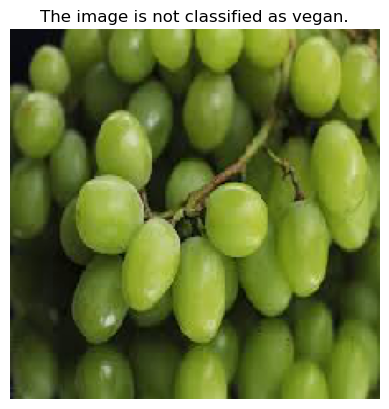

In [521]:
# Load and preprocess the image
img_path = '100.jpg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. 

predictions = model_inception1.predict(img_array)

# Threshold for classification
threshold = 0.05  

is_vegan = predictions[0][0] > threshold

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the result
if is_vegan:
    plt.title("The image is classified as vegan.")
else:
    plt.title("The image is not classified as vegan.")

# Show the image with the result
plt.show()